In [265]:
# import the classes
from chorogrid import Colorbin, Chorogrid

In [266]:
#colors
# found this lib I like https://github.com/jackparmer/colorlover
import colorlover as cl 

my20 = cl.scales['10']['qual']['Paired'] + cl.scales['10']['qual']['Set3'] 
# merging two sets here, as I need many (19) for counties

# print(my20) # retruns rgb...

def rgb2hex(list_of_tuples):
    output = []
    for r, g, b in list_of_tuples:
        output.append("#{0:02x}{1:02x}{2:02x}".format(int(r), int(g), int(b)))
    return output

colors = rgb2hex(cl.to_numeric(my20))

In [267]:
# assign color based on county 
import pandas as pd

# load our data, where you should load youre own
df = pd.read_csv('chorogrid/databases/norway_municilalities.csv')

mybin = Colorbin(df['fylkesnummer'], colors, proportional=True, decimals=None)
mybin.set_decimals(0) # there are no decimals in cointiy numers..
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')

In [268]:
# lets take a look
kommuner = list(df.kommuneid)#
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels


for lst in ['kommuner', 'colors_by_state', 'font_colors_by_state', 'legend_colors', 'legend_labels']:
    obj = eval(lst)
    print("{:>20}: len {:2}: {}...".format(lst, len(obj), obj[:3]))

            kommuner: len 426: [101, 104, 105]...
     colors_by_state: len 426: ['#a6cee3', '#a6cee3', '#a6cee3']...
font_colors_by_state: len 426: ['#101010', '#101010', '#101010']...
       legend_colors: len 20: ['#a6cee3', '#1f78b4', '#b2df8a']...
       legend_labels: len 20: ['1.0-2.0', '2.0-3.0', '3.0-4.0']...


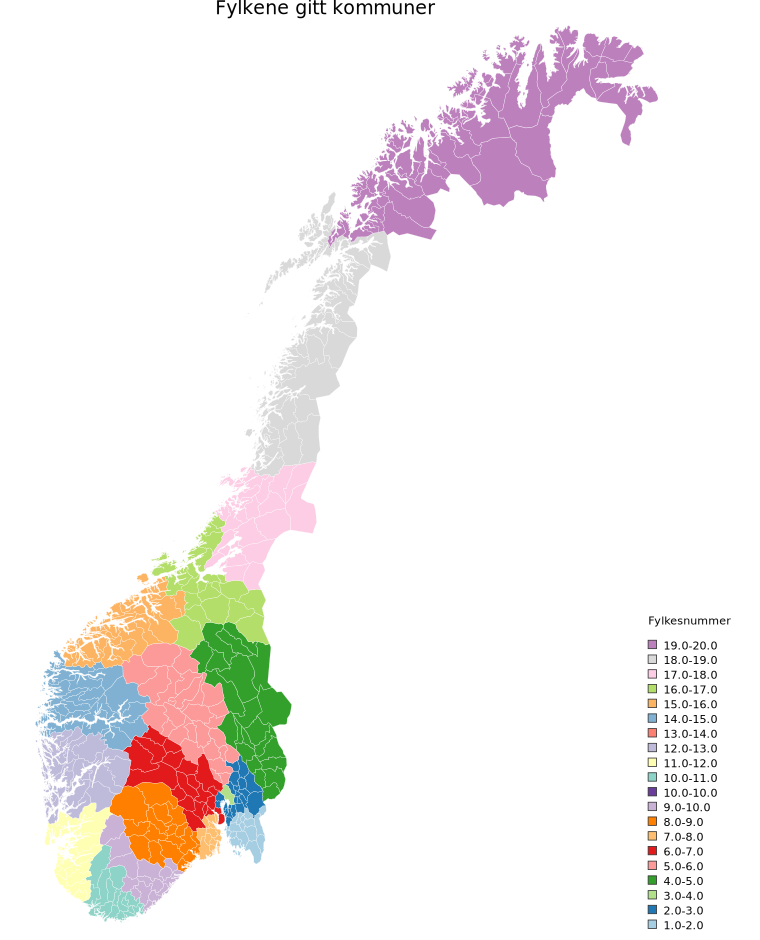

In [269]:
# lets draw the map of Norway
cg = Chorogrid('chorogrid/databases/norway_municilalities2.csv', kommuner, colors_by_state,id_column="kommuneid")
cg.set_title('Fylkene gitt kommuner', font_dict={'font-size': '60px'})

cg.set_legend(legend_colors, legend_labels, title='Fylkesnummer', height=1000, gutter=20, stroke_width=2.5,
             font_dict={'font-size': '35px'})

cg.draw_map(spacing_dict={'margin_right': 50, "map_width":700, "map_height": 900, 
                          "preserveAspectRatio": "xMinYMin",
                          'viewbox': [0, 0, 2104, 2979]})
cg.done(show=True)


In [270]:
# view some colors..
#import colorlover as cl
#from IPython.display import HTML
#HTML(cl.to_html( cl.flipper()['seq']['9'] ))

In [271]:
# now lets do something more usefull, lets color by... population (folketal)

# I want fewer colors now..
color_green2blue = cl.flipper()['seq']['9']['GnBu'] # returns rgb GnBu
interp_color = cl.to_hsl(cl.interp( color_green2blue, 20 )) # Map color scale to 20 bins
HTML( cl.to_html( interp_color ) ) # lets look at the colors

interp_color_rgb = cl.to_rgb(interp_color) # hsl 2 rbg
interp_color_hex = rgb2hex(cl.to_numeric(interp_color_rgb)) # rgb to numeric to hex


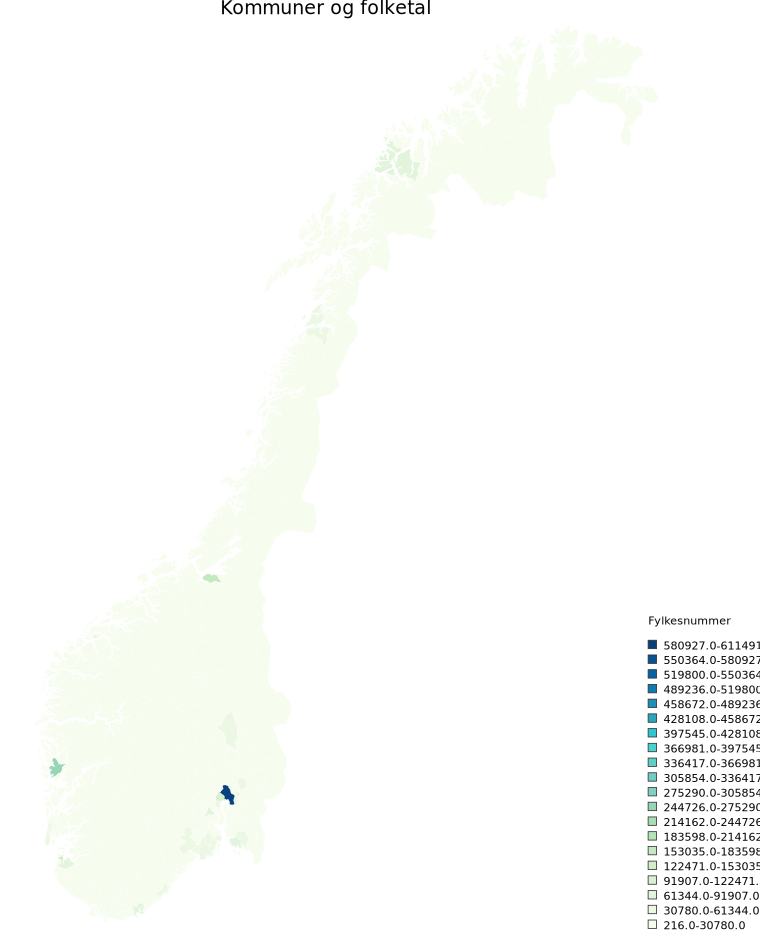

In [272]:
# pass folketal into the colorbin
mybin = Colorbin(df['folketal'], interp_color_hex, proportional=True, decimals=None)
mybin.set_decimals(0) # there are no decimals in cointiy numers..
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')

# rename some variables to more semantically apropriate..
kommuner = list(df.kommuneid)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels


# lets draw the map of Norway
cg = Chorogrid('chorogrid/databases/norway_municilalities2.csv', kommuner, colors_by_state,id_column="kommuneid")
cg.set_title('Kommuner og folketal', font_dict={'font-size': '60px'})

cg.set_legend(legend_colors, legend_labels, title='Fylkesnummer', height=1000, gutter=20, stroke_width=2.5,
             font_dict={'font-size': '35px'})

cg.draw_map(spacing_dict={'margin_right': 50, "map_width":700, "map_height": 900, 
                          "preserveAspectRatio": "xMinYMin",
                          'viewbox': [0, 0, 2104, 2979]})
cg.done(show=True)

# not super-usefull, but remember that any numerics for municipalities can be mapped now.

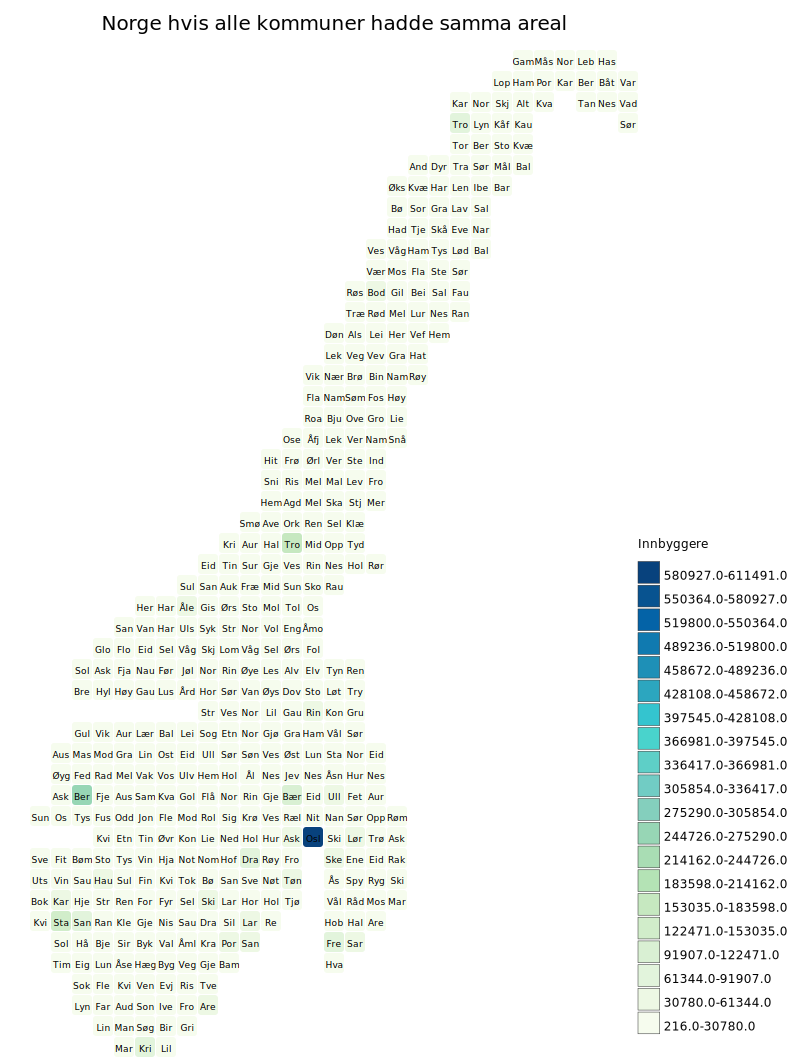

In [273]:

# lets make the same map, but with a square layout:
cg = Chorogrid('chorogrid/databases/norway_municilalities2.csv', kommuner, colors_by_state, id_column="kommuneid",lable_column="Navn")#,
cg.set_title('Norge hvis alle kommuner hadde samma areal', font_dict={'font-size': 20})

cg.set_legend(legend_colors, legend_labels, title='Innbyggere',
                height=500, gutter=2, stroke_width=0.5, label_x_offset=2,
                label_y_offset = 3,
                font_dict={'font-size': '12px'}
             )

cg.draw_squares(height=1000,
                spacing_dict={'margin_right': 160, 'cell_width': 20, 'margin_top': 50}, # for cicles add 'roundedness':10 ! 
                font_dict={'font-size': '9px'}) # otherwise legend will be cut off

cg.done(show=True)


## The grid is drawn manually, and the municipalities just approx where they should be.

If someone want to redraw the map in a nicer way, look at the file '_sources/grid5_plain_final_fixed_titles.svg'

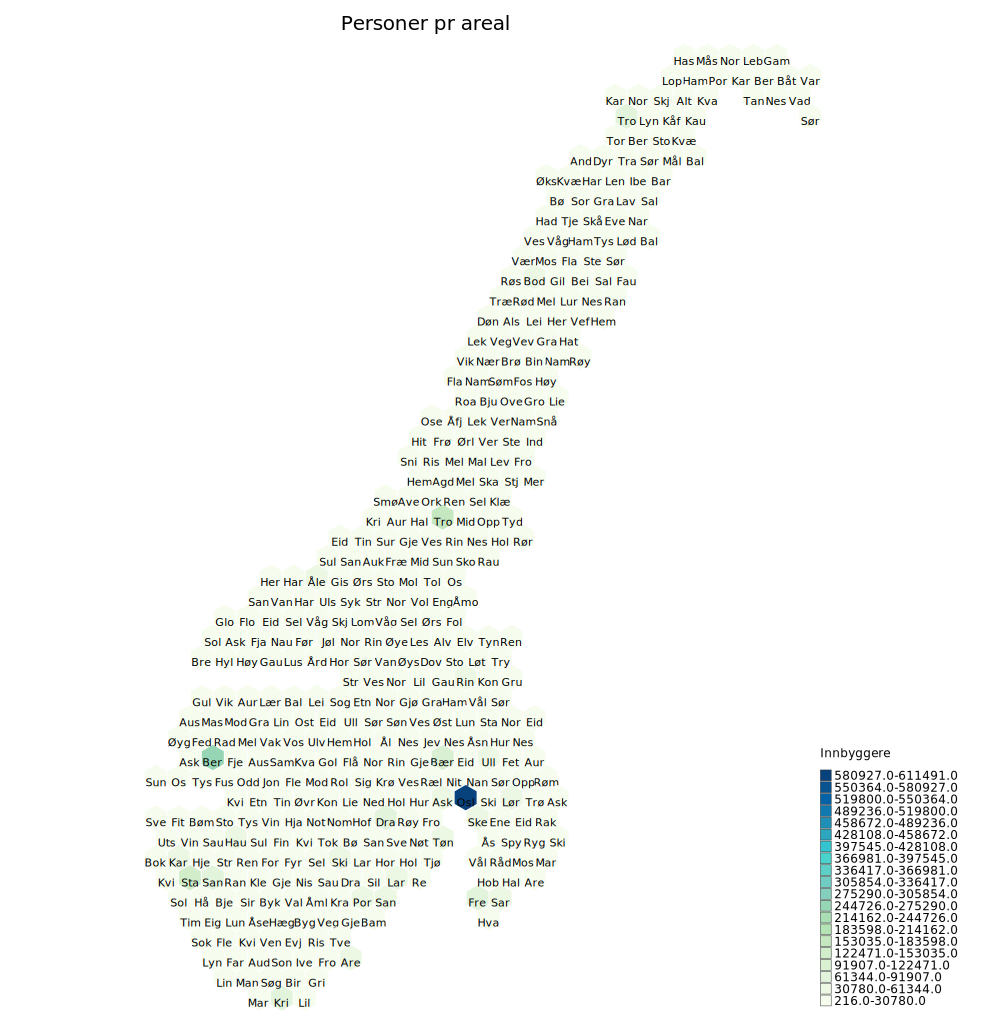

In [307]:
# Squares are good. Hexagons are also fun:

cg = Chorogrid('chorogrid/databases/norway_municilalities2.csv', kommuner, colors_by_state, id_column="kommuneid",lable_column="abbrev")#,

#cg.df.head()
cg.set_title('Personer pr areal', font_dict={'font-size': 20})
cg.set_legend(legend_colors, legend_labels, title='Innbyggere', height=250, gutter=1, stroke_width=0.5, label_x_offset=2,
                   label_y_offset = 0, font_dict={'font-size': '12px'})

cg.draw_hex(spacing_dict={'margin_right': 160, 'cell_width': 22, 'margin_top': 50}, font_dict={'font-size': '11px'}) 
cg.done(show=True)

# Now the map demo is done.


The next section sescribes how this map can be used with data from data.ssb.no


### I want to comapare municipalities, to fine the once people move inn or out of, based on population.
E.g. who are growing more in percentage.


### HP1: Oslo, Bergen, Stavanger, Trondheim and Tromsø are growing most.
### HP2: Rural municipalities are schrinking.

In [445]:
# lets try to add some data from ssb, I test jsonstat here, there is also pyjstat
import jsonstat
url = "http://data.ssb.no/api/v0/dataset/1108.json?lang=no"
collection = jsonstat.from_url(url)

# print list of dataset contained into the collection
print(collection)

print()
# select the first dataset of the collection and print a short description
oecd = collection.dataset(0)
print(oecd)

print("~."*15)
# print description about each dimension of the dataset
for d in oecd.dimensions():
    print(d)


# print a datapoint contained into the dataset
#print(oecd.value(Region='0101', ContentsCode='Folketilvekst10'))

JsonstatCollection contains the following JsonStatDataSet:
+-----+-----------+
| pos | dataset   |
+-----+-----------+
| 0   | 'dataset' |
+-----+-----------+

name:   'dataset'
label:  'Folkemengd og kvartalsvise endringar, etter region, statistikkvariabel og tid'
source: 'Folkemengd og kvartalsvise endringar, etter region, statistikkvariabel og tid'
size: 4686
+-----+--------------+--------------------+------+--------+
| pos | id           | label              | size | role   |
+-----+--------------+--------------------+------+--------+
| 0   | Region       | region             | 426  | geo    |
| 1   | ContentsCode | statistikkvariabel | 11   | metric |
| 2   | Tid          | tid                | 1    | time   |
+-----+--------------+--------------------+------+--------+
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
+-----+--------+--------------------------------------+
| pos | idx    | label                                |
+-----+--------+--------------------------------------+
| 0   | '0101' |

In [354]:
url = "http://data.ssb.no/api/v0/dataset/1108.json?lang=no"
collection = jsonstat.from_url(url)

# print list of dataset contained into the collection
print(collection)


data = collection.dataset('dataset')
data


data.dimension('Region')
data.dimension('ContentsCode')
data.dimension('Tid')

data.value(Tid='2017K1') # usikker på hva dette egentlig er

df_1 = data.to_data_frame('ContentsCode',content='idx')
df_1.tail()


#df_1.loc[df_1['ContentsCode'] == 'Folketilvekst10']#.head()

JsonstatCollection contains the following JsonStatDataSet:
+-----+-----------+
| pos | dataset   |
+-----+-----------+
| 0   | 'dataset' |
+-----+-----------+


name:   'dataset'
label:  'Folkemengd og kvartalsvise endringar, etter region, statistikkvariabel og tid'
source: 'Folkemengd og kvartalsvise endringar, etter region, statistikkvariabel og tid'
size: 4686
+-----+--------------+--------------------+------+--------+
| pos | id           | label              | size | role   |
+-----+--------------+--------------------+------+--------+
| 0   | Region       | region             | 426  | geo    |
| 1   | ContentsCode | statistikkvariabel | 11   | metric |
| 2   | Tid          | tid                | 1    | time   |
+-----+--------------+--------------------+------+--------+

+-----+--------+--------------------------------------+
| pos | idx    | label                                |
+-----+--------+--------------------------------------+
| 0   | '0101' | 'Halden'                             |
| 1   | '0104' | 'Moss'                               |
| 2   | '0105' | 'Sarpsborg'                          |
| 3   | '0106' | 'Fredrikstad'                        |
| 4   | '0111' | 'Hvaler'                             |
| 5   | '0118' | 'Aremark'                            |
| 6   | '0119' | 'Marker'                             |
| 7   | '0121' | 'Rømskog'                            |
| 8   | '0122' | 'Trøgstad'                           |
| 9   | '0123' | 'Spydeberg'                          |
| 10  | '0124' | 'Askim'                              |
| 11  | '0125' | 'Eidsberg'                           |
| 12  | '0127' | 'Skiptvet'                           |
| 13  | '0128' | 'Rakkestad'                          |
| 14  | '0135' | 'Råde'                               |
| 15  | '0136' | 'Rygge'                              |
| 16  | '0137' | 'Våler (Østf.)'                      |
| 17  | '0138' | 'Hobøl'                              |
| 18  | '0211' | 'Vestby'                             |
| 19  | '0213' | 'Ski'                                |
| 20  | '0214' | 'Ås'                                 |
| 21  | '0215' | 'Frogn'                              |
| 22  | '0216' | 'Nesodden'                           |
| 23  | '0217' | 'Oppegård'                           |
| 24  | '0219' | 'Bærum'                              |
| 25  | '0220' | 'Asker'                              |
| 26  | '0221' | 'Aurskog-Høland'                     |
| 27  | '0226' | 'Sørum'                              |
| 28  | '0227' | 'Fet'                                |
| 29  | '0228' | 'Rælingen'                           |
| 30  | '0229' | 'Enebakk'                            |
| 31  | '0230' | 'Lørenskog'                          |
| 32  | '0231' | 'Skedsmo'                            |
| 33  | '0233' | 'Nittedal'                           |
| 34  | '0234' | 'Gjerdrum'                           |
| 35  | '0235' | 'Ullensaker'                         |
| 36  | '0236' | 'Nes (Ak.)'                          |
| 37  | '0237' | 'Eidsvoll'                           |
| 38  | '0238' | 'Nannestad'                          |
| 39  | '0239' | 'Hurdal'                             |
| 40  | '0301' | 'Oslo kommune'                       |
| 41  | '0402' | 'Kongsvinger'                        |
| 42  | '0403' | 'Hamar'                              |
| 43  | '0412' | 'Ringsaker'                          |
| 44  | '0415' | 'Løten'                              |
| 45  | '0417' | 'Stange'                             |
| 46  | '0418' | 'Nord-Odal'                          |
| 47  | '0419' | 'Sør-Odal'                           |
| 48  | '0420' | 'Eidskog'                            |
| 49  | '0423' | 'Grue'                               |
| 50  | '0425' | 'Åsnes'                              |
| 51  | '0426' | 'Våler (Hedm.)'                      |
| 52  | '0427' | 'Elverum'                            |
| 53  | '0428' | 'Trysil'                             |
| 54  | '0429' | 'Åmot'                               |
| 55  | '0430' | 'Stor-Elvdal'                        |
| 56  | '0432' | 'Rendalen'                           |
| 57  | '0434' | 'Engerdal'                           |
| 58  | '0436' | 'Tolga'                              |
| 59  | '0437' | 'Tynset'                             |
| 60  | '0438' | 'Alvdal'                             |
| 61  | '0439' | 'Folldal'                            |
| 62  | '0441' | 'Os (Hedm.)'                         |
| 63  | '0501' | 'Lillehammer'                        |
| 64  | '0502' | 'Gjøvik'                             |
| 65  | '0511' | 'Dovre'                              |
| 66  | '0512' | 'Lesja'                              |
| 67  | '0513' | 'Skjåk'                              |
| 68  | '0514' | 'Lom'  

+-----+---------------------+----------------------------------------------+
| pos | idx                 | label                                        |
+-----+---------------------+----------------------------------------------+
| 0   | 'Folketallet1'      | 'Folketalet ved inngangen av kvartalet'      |
| 1   | 'Fodte2'            | 'Fødde'                                      |
| 2   | 'Dode3'             | 'Døde'                                       |
| 3   | 'Fodselsoverskudd4' | 'Fødselsoverskot'                            |
| 4   | 'Innvandring5'      | 'Innvandring'                                |
| 5   | 'Utvandring6'       | 'Utvandring'                                 |
| 6   | 'Tilflytting7'      | 'Innflytting, innalandsk'                    |
| 7   | 'Fraflytting8'      | 'Utflytting, innalandsk'                     |
| 8   | 'Nettoinnflytting9' | 'Nettoinnflytting, inkl. inn- og utvandring' |
| 9   | 'Folketilvekst10'   | 'Folkevekst'                                 |
| 10  | 'Folketallet11'     | 'Folketalet ved utgangen av kvartalet'       |
+-----+---------------------+----------------------------------------------+

+-----+----------+----------+
| pos | idx      | label    |
+-----+----------+----------+
| 0   | '2017K1' | '2017K1' |
+-----+----------+----------+

30790

Region     Tid  Value
ContentsCode                           
Tilflytting7        2030  2017K1     84
Fraflytting8        2030  2017K1    101
Nettoinnflytting9   2030  2017K1     -4
Folketilvekst10     2030  2017K1    -11
Folketallet11       2030  2017K1  10188

In [446]:
data.value(ContentsCode='Folketilvekst10', Tid='2017K1', Region="0104") # innflytting i antall hoder
data.value(ContentsCode='Folketallet11', Tid='2017K1', Region="0104") # inbyggere ved kvartalets slutt

38

32445

# We have now played around with jsonstat
is seems that `data.value(ContentsCode='Folketilvekst10', Tid='2017K1', Region="0104")` gives what I want.

In [454]:
# lets make a table so 
header = ["kommun","Navn", "Folketilvekst10", "Folketallet11"] #"fyttetrend"

kommune = []
navn = []
Folketilvekst10 = []
Folketallet11 = []

for r in cg.df.iterrows():
    # if kommuneid is len()==3, prepend a 0 and make it a string
    if len(str(r[1].kommuneid)) != 4:
        tmp_id = '0'+str(r[1].kommuneid)
    else:
        tmp_id = str(r[1].kommuneid)
    #print(tmp_id, type(tmp_id), r[1].Navn)
    
    kommune.append(tmp_id)    
    navn.append(r[1].Navn)
    Folketilvekst10.append(data.value(ContentsCode='Folketilvekst10', Tid='2017K1', Region=tmp_id))
    Folketallet11.append(data.value(ContentsCode='Folketallet11', Tid='2017K1', Region=tmp_id))
    
mini_df = pd.DataFrame([[a,b,c,d] for a,b,c,d in zip(kommune, navn,Folketilvekst10, Folketallet11)])
mini_df.columns = header

# make a move trend index based on population
mini_df['fyttetrend'] = mini_df['Folketilvekst10'] / mini_df['Folketallet11'] *100
mini_df.head()

kommun         Navn  Folketilvekst10  Folketallet11  fyttetrend
0   0101       Halden               33          30823    0.107063
1   0104         Moss               38          32445    0.117121
2   0105    Sarpsborg               13          55140    0.023576
3   0106  Fredrikstad               86          80207    0.107223
4   0111       Hvaler               -9           4508   -0.199645

# Nice. I have my trend, for all municipalities
Lets through that at the map and see what it looks like:

In [455]:
# deal with color
my10 = cl.scales['11']['div']['Spectral']
colors = rgb2hex(cl.to_numeric(my10))

mybin = Colorbin(mini_df['fyttetrend'], colors, proportional=True, decimals=None)
mybin.set_decimals(5) # there are no decimals in cointiy numers..
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')

In [456]:
kommuner = list(mini_df.kommun) # now as strings, with leading 0 for 3 digit numers
kommuner = [int(n) for n in kommuner] # now int with no leading 0. (same as in the database for Chorogrid)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels

In [457]:
# just the plain map
#cg = Chorogrid('chorogrid/databases/norway_municilalities2.csv', kommuner, colors_by_state,id_column="kommuneid")
#cg.set_title('Fylkene gitt kommuner', font_dict={'font-size': '60px'})

#cg.set_legend(legend_colors, legend_labels, title='Fylkesnummer', height=1000, gutter=20, stroke_width=2.5,
#             font_dict={'font-size': '35px'})

#cg.draw_map(spacing_dict={'margin_right': 50, "map_width":700, "map_height": 900, 
#                          "preserveAspectRatio": "xMinYMin",
#                          'viewbox': [0, 0, 2104, 2979]})
#cg.done(show=True)

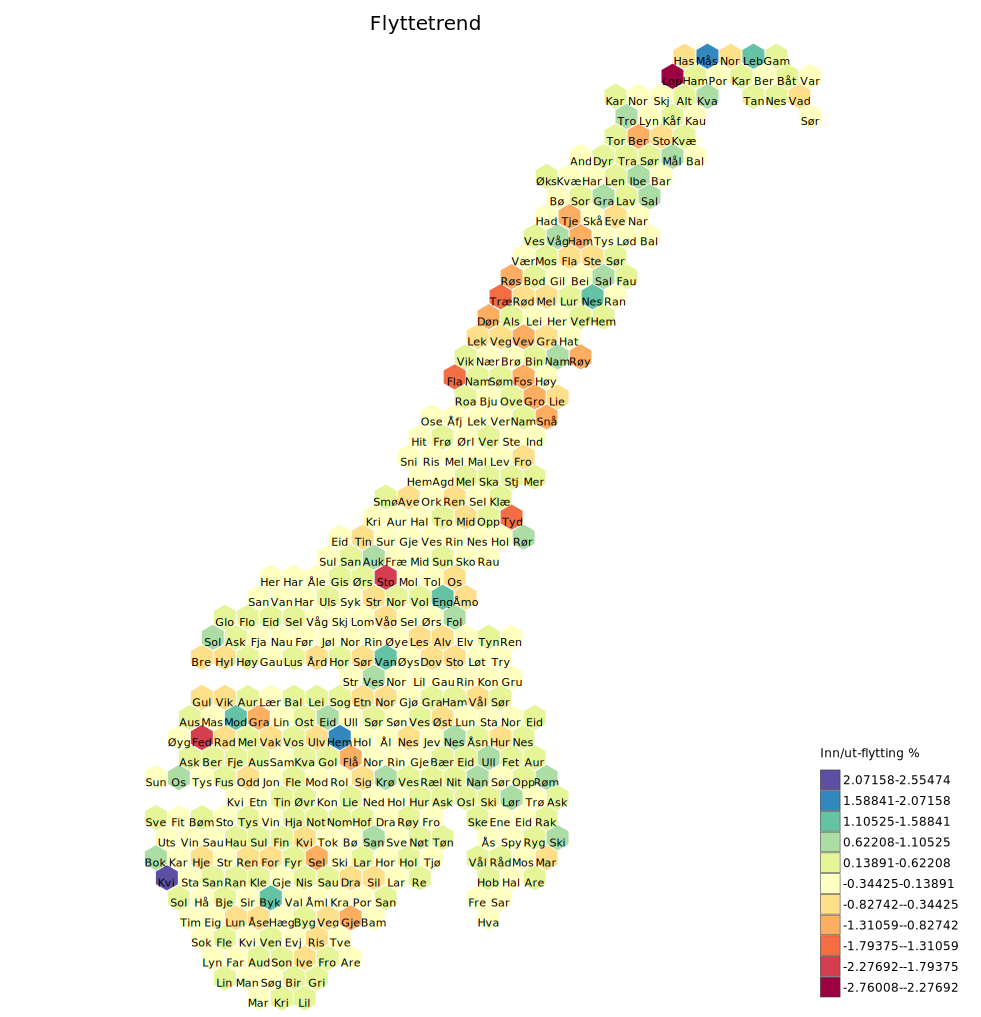

In [466]:
cg = Chorogrid('chorogrid/databases/norway_municilalities2.csv', kommuner, colors_by_state, id_column="kommuneid",lable_column="abbrev")#,

#cg.df.head()
cg.set_title('Flyttetrend', font_dict={'font-size': 20})
cg.set_legend(legend_colors, legend_labels, title='Inn/ut-flytting %', height=250, gutter=1, stroke_width=0.5, label_x_offset=2,
                   label_y_offset = 0, font_dict={'font-size': '12px'})

cg.draw_hex(spacing_dict={'margin_right': 160, 'cell_width': 22, 'margin_top': 50}, font_dict={'font-size': '11px'}) 
cg.done(show=True)

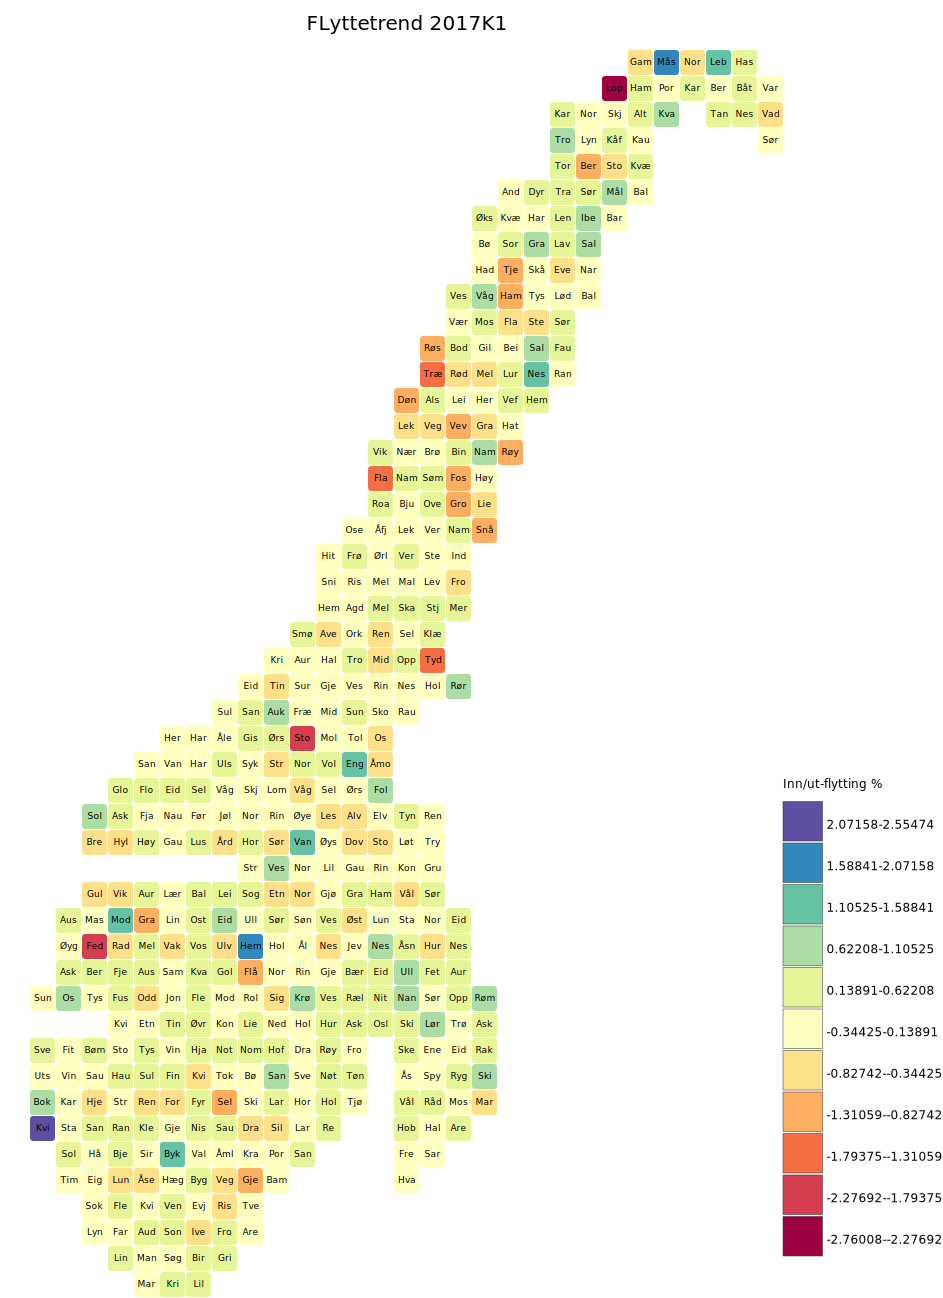

In [469]:
cg = Chorogrid('chorogrid/databases/norway_municilalities2.csv', kommuner, colors_by_state, id_column="kommuneid",lable_column="Navn")#,
cg.set_title('FLyttetrend 2017K1', font_dict={'font-size': 20})

cg.set_legend(legend_colors, legend_labels, title='Inn/ut-flytting %',
                height=500, gutter=2, stroke_width=0.5, label_x_offset=2,
                label_y_offset = 3,
                font_dict={'font-size': '12px'}
             )

cg.draw_squares(height=1000,
                spacing_dict={'margin_right': 160, 'cell_width': 25, 'margin_top': 50}, # for cicles add 'roundedness':10 ! 
                font_dict={'font-size': '9px'}) # otherwise legend will be cut off

cg.done(show=True)

# Resultater

Som prosent av em kommunes befolkning, er ikke storbyene de som stikker seg ut. Hele landet er ganske stabilt, med små seiere og tap mellom kommunene. 

Noen kommuner stikker seg ut, de er enten veldig positive eller negative. Det er lett å se hvor de er. Det er lett å bruke dette for å finne ut hvilke kommuner vi skal se videre på.